In [6]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In this notebook I am gonna demonstrate 6 different models 
1.Principal Component Analysis
2.Logistic Regression
3.Gaussian Naive Bayes
4.Support vector Machine
5.Random Forest Classifier
6.Decision trees
7.Simple Neutral network

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv("mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


In [27]:
#Checking for null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [28]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [29]:
data.shape

(8124, 23)

In [0]:
#Thus we have 22 features(1st one is label) and 8124 instances. Now let us check which features constitures maximul information.

In [0]:
#We can see that the dataset has values in strings. We need to convert all the unique values to integers. Thus we perform label encoding on the data.

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
  data[col]=labelencoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
#Checking the encoded values

In [34]:
data['stalk-color-above-ring'].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8])

In [35]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


In [0]:
#plotting boxplot to see the distributions of the data

AttributeError: ignored

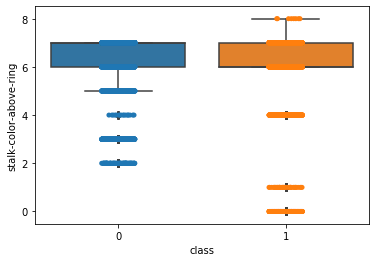

In [37]:
'''
# creating a figure instance
fig, axes = plt.subplots(nrows=2 ,ncols=2 ,figsize=(9, 9))

# creating axes instance and the boxplot
bp1 = axes[0,0].boxplot(data['stalk-color-above-ring'],patch_artist=True)

bp2 = axes[0,1].boxplot(data['stalk-color-below-ring'],patch_artist=True)

bp3 = axes[1,0].boxplot(data['stalk-surface-below-ring'],patch_artist=True)

bp4 = axes[1,1].boxplot(data['stalk-surface-above-ring'],patch_artist=True)
'''
ax=sns.boxplot(x='class',y='stalk-color-above-ring',data=data)
ax=sns.stripplot(x="class",y='stalk-color-above-ring',data=data,jitter=True,edgecolor="gray")
sns.plt.title("Class w.r.t stalkcolor above ring",fontsize=12)

In [38]:
#Separation of features from label
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [39]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [40]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [41]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [42]:
#Standardising the data

#Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [43]:
#We can avoid PCA here since the dataset has not many dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.59211948e-17],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  4.35476041e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  1.93182410e-17],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  7.01453987e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -3.98483680e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  7.43806407e-20]])

In [0]:
covariance=pca.get_covariance()
#covariance

In [45]:
explained_variance=pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 7.90604723e-34])

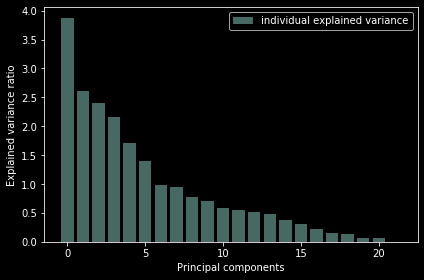

In [46]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [0]:
#We can see that the last 4 components has less amount of variance of the data. The 1st 17 components retains more than 90% of the data.

In [0]:
#Let us take only first two pricipal components and visualise it using K-means clustering

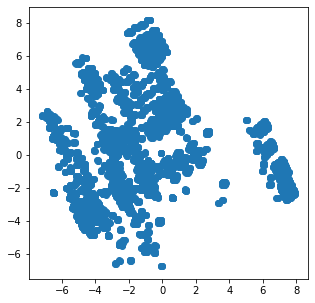

In [49]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

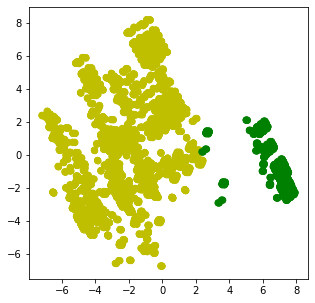

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

In [0]:
#Thus using K-Means we are able segregate 2 classes well using the first two components with maximum variance

In [0]:
#Performing PCA by taking 17 components with maximum varianc

In [53]:
pca_modified=PCA(n_components=17)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

In [0]:
#splitting the data into train and test set's

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [0]:
#Default Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR=LogisticRegression()

In [57]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_prob=model_LR.predict_proba(X_test)[:,1] #This will give you positive class prediction probabilities
y_pred=np.where(y_prob>0.5,1,0) # This will threshold the probabilities to give class predictions
model_LR.score(X_test,y_pred)

1.0

In [59]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[815,  30],
       [ 36, 744]])

In [60]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9591715976331362

In [61]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.9903474434835382

Text(0.5, 0, 'False Positive Rate')

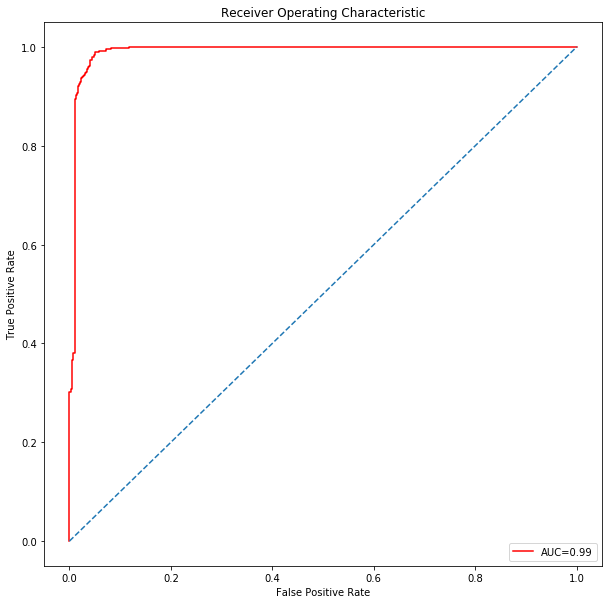

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


Gaussian Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
model_naive=GaussianNB()
model_naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_prob=model_naive.predict_proba(X_test)[:,1] #This will give you positive class prediction probabilities
y_pred=np.where(y_prob>0.5,1,0) #This will threshold the probabilities to give class predictions.
model_naive.score(X_test,y_pred)

1.0

In [65]:
print("Number of mislabeled points from %d points: %d" %(X_test.shape[0],(y_test!=y_pred).sum()))

Number of mislabeled points from 1625 points: 111


In [66]:
scores=cross_val_score(model_naive,X,y,cv=10,scoring='accuracy')
print(scores)

[0.59778598 0.78843788 0.97908979 0.9803198  0.84852217 0.81773399
 0.8091133  0.81650246 0.85098522 0.97536946]


In [67]:
scores.mean()

0.8463860057319785

In [68]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[786,  59],
       [ 52, 728]])

In [69]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.94      0.93      0.93       845\n           1       0.93      0.93      0.93       780\n\n    accuracy                           0.93      1625\n   macro avg       0.93      0.93      0.93      1625\nweighted avg       0.93      0.93      0.93      1625\n'

In [70]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9317554240631164

In [71]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.9592201486876043

Text(0.5, 0, 'False Positive Rate')

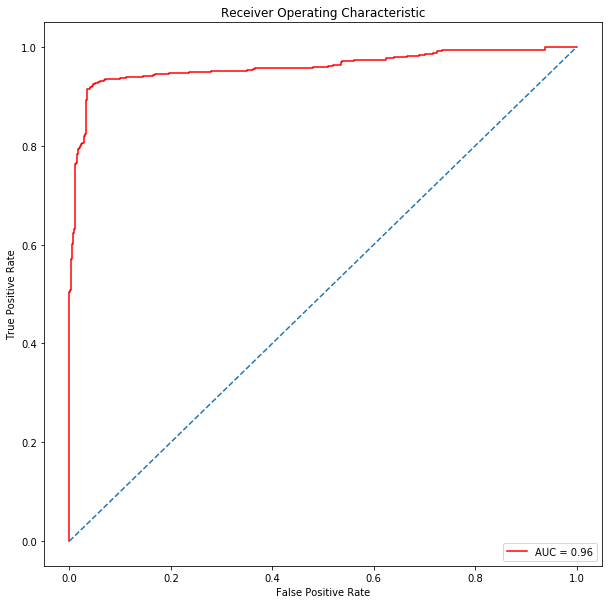

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Support Vector Machine

In [0]:
from sklearn.svm import SVC
svm_model=SVC()

Gamma parameter defines signigicance of each training examples, with low values mean FAR and high values mean 'CLOSE'. This parameter can be seen as the inverse radius of influence of samples selcted by the support vector models


The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

In [0]:
#Support vector Machine without polynomial kernel

In [0]:
tuned_parameters={
    'C':[1,10,100,500,1000],'kernel':['linear','rbf'],
    'C':[1,10,100,500,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf'],
    #'degree':[2,3,4,5,6],'C':[1,10,100,500,1000],'kernel':['poly']
}

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the tuned_parameter**.The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained. But it is proving computationally expensive here.So I am opting for RandomizedSearchCV.

RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search: 1)A budget can be chosen independent of the number of parameters and possible values. 2)Adding parameters that do not influence the performance does not decrease efficiency.

In [0]:
#from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV,RandomizedSearchCV
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [77]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [80]:
print(model_svm.cv_results_)

{'mean_fit_time': array([0.51243486, 1.51068466, 3.469345  , 0.12742519, 0.33665257,
       3.46428211, 0.14470909, 0.12800903, 0.55810702, 0.31342108,
       0.33799236, 0.33539286, 3.4638912 , 0.2807142 , 3.46200924,
       0.50352817, 0.33351312, 0.33993447, 0.75719814, 0.12904098]), 'std_fit_time': array([0.01242182, 0.02090094, 0.22126742, 0.00258948, 0.0059902 ,
       0.22654635, 0.0024108 , 0.00294254, 0.01586435, 0.00467448,
       0.0071393 , 0.00425768, 0.22691835, 0.01177797, 0.23549984,
       0.01915157, 0.00240044, 0.00832524, 0.00660534, 0.00571862]), 'mean_score_time': array([0.02734122, 0.11692381, 0.13054171, 0.00466039, 0.02316947,
       0.13071275, 0.00780725, 0.00478785, 0.02521496, 0.02464979,
       0.0232512 , 0.02270639, 0.13226399, 0.00639007, 0.13111911,
       0.03101556, 0.0227061 , 0.01971178, 0.05347815, 0.00470603]), 'std_score_time': array([1.72268171e-03, 6.17835893e-04, 8.97111900e-04, 1.05936297e-04,
       8.21030716e-04, 7.29704318e-04, 1.1249492

In [81]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'gamma': 1, 'C': 1000}


In [82]:
y_pred=model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [83]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [84]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [85]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

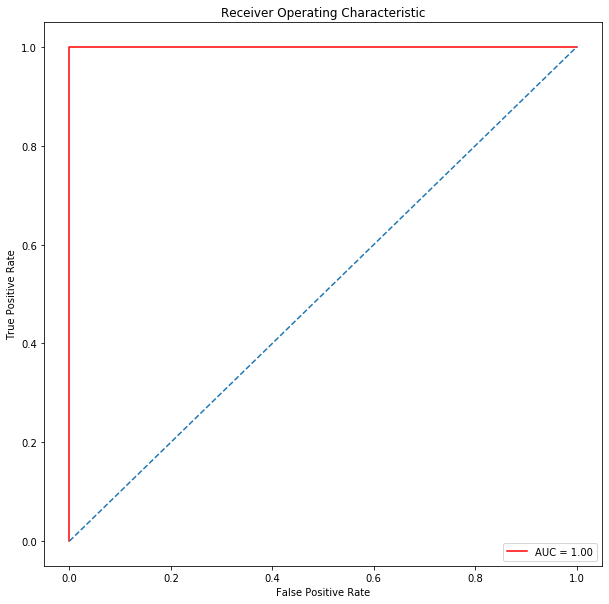

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [0]:
#suport vector machine with polynomial kernel

In [0]:
tuned_parameters={
    'C':[1,10,100,500,1000],'kernel':['linear','rbf'],
    'C':[1,10,100,500,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf'],
    'degree':[2,3,4,5,6],'C':[1,10,100,500,1000],'kernel':['poly']
}

In [0]:
#from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV,RandomizedSearchCV
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [90]:
model_svm.fit(X_train,y_train)
print(model_svm.best_score_)

1.0


In [91]:
print(model_svm.cv_results_)

{'mean_fit_time': array([1.28026164, 1.4798975 , 1.47534518, 0.11411381, 0.13102386,
       1.50805831, 0.13666232, 0.09001608, 1.51006303, 0.08996565,
       0.08847637, 1.50631957, 0.77266309, 0.1112078 , 0.28596475,
       0.40612152, 1.50122843, 1.47439888, 1.54290192, 0.09053013]), 'std_fit_time': array([0.00991182, 0.01108976, 0.00568363, 0.00241395, 0.00158801,
       0.01081114, 0.00530665, 0.00202169, 0.01223816, 0.00185618,
       0.00166553, 0.00958164, 0.01073979, 0.00247807, 0.01005014,
       0.00535249, 0.01529036, 0.00871069, 0.01920612, 0.0021183 ]), 'mean_score_time': array([0.08692136, 0.10273421, 0.10250015, 0.00574627, 0.0084944 ,
       0.10639589, 0.00718143, 0.00421722, 0.10631626, 0.00399683,
       0.00405149, 0.10634623, 0.05482812, 0.00635149, 0.02121038,
       0.03020642, 0.10570495, 0.10283673, 0.10702612, 0.00400474]), 'std_score_time': array([1.00908168e-03, 4.40983947e-04, 2.03715996e-04, 1.46037800e-04,
       9.41905148e-05, 5.18368401e-04, 2.1649461

In [92]:
print(model_svm.best_params_)

{'kernel': 'poly', 'gamma': 0.1, 'degree': 5, 'C': 100}


In [93]:
y_pred=model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [94]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [95]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [96]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [97]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

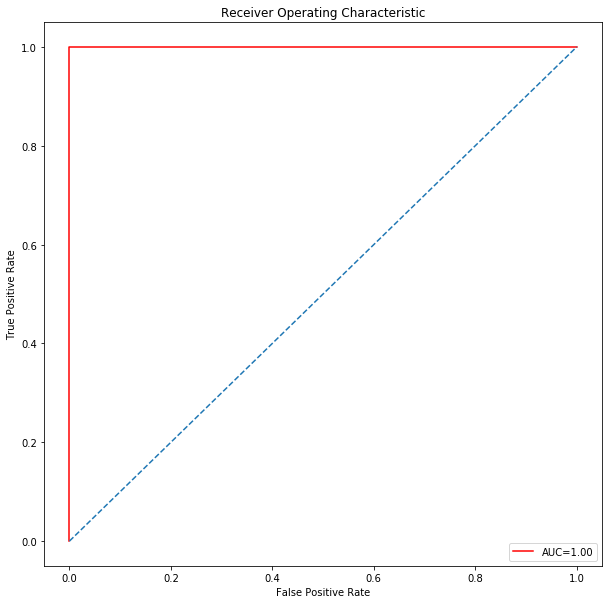

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [99]:
#trying default model
from sklearn.ensemble import RandomForestClassifier
model_RR=RandomForestClassifier()

#tuned_parameters={'min_samples_leaf': range(5,10,5),'n_estimators':range(50,200,50),
                  #'max_depth':range(5,15,5),'max_features':range(5,20,5)}

model_RR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
y_prob=model_RR.predict_proba(X_test)[:,1]  #This will give you positive class prediction probabilities
y_pred=np.where(y_prob>0.5,1,0) #This will threshold the probabilities to give class predictions.
model_RR.score(X_test,y_pred)

1.0

In [101]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [102]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [103]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

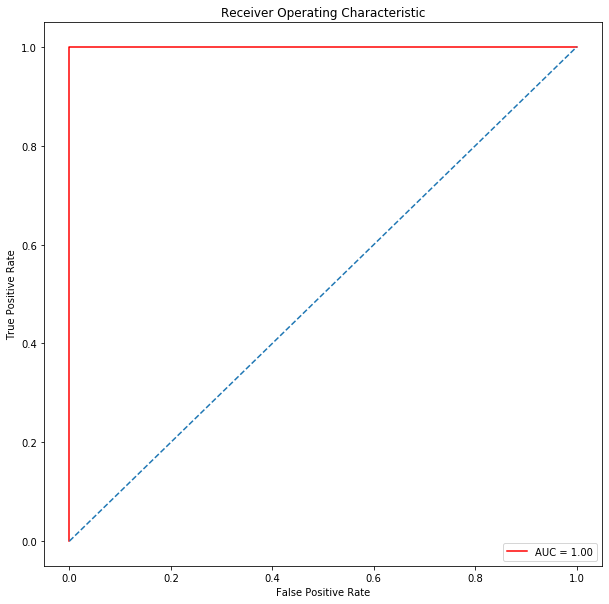

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Random forest model is giving us best accuracy

tuend parameters of Random Forest just for the purpose of knowledge and demonstration

3 features which can be tuned to improve the performace of Random Forest


1.   max_features
2.   n_estimators
3.   min_sample_leaf

A)max_features: These are the maximum number of features Random Forest is allowed to try in individual tree 

1)Auto: This will simply take all the features which make sense in every tree. Here we simply do not put any restrictions on the individual tree

2)sqrt: This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree

3)log2: It is another option which takes log to the base 2 of the features input.

**Increading max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features**

B)n_estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high vlaues as your processor can handle because this makes your predictions stronger and more stable.

C) min_sample_leaf: Leaf is the end node of a decision tree. A smaller leaf makes more prone to capturing noise in train data. Hence it is important to try different values to get good estimate.


In [0]:
from sklearn.ensemble import RandomForestClassifier
model_RR=RandomForestClassifier()

tuned_parameters={'min_samples_leaf':range(10,100,10),'n_estimators':range(10,100,10),'max_features':['auto','sqrt','log2']}

In [0]:
#n_jobs

In [0]:
#This parameter tells the engine how many processors is it allowed to use. A value of "-1" means there is no restriction whereas a value of "1" means it can only use one processor.

In [0]:
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV
RR_model=RandomizedSearchCV(model_RR,tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs=-1)

In [112]:
RR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [113]:
print(RR_model.cv_results_)

{'mean_fit_time': array([0.38294525, 0.38132248, 0.26001508, 0.34765148, 0.38288214,
       0.04708037, 0.12962804, 0.25993042, 0.26043139, 0.04540141,
       0.37556677, 0.32936909, 0.3728863 , 0.26113694, 0.37753131,
       0.38842633, 0.30144906, 0.25869374, 0.30150177, 0.32195406]), 'std_fit_time': array([0.01689667, 0.00847495, 0.00363172, 0.00380857, 0.00841528,
       0.00186428, 0.00274161, 0.01542492, 0.00316627, 0.00167082,
       0.00607991, 0.00427349, 0.00582988, 0.00315445, 0.0086348 ,
       0.0103458 , 0.00431783, 0.00571857, 0.00375366, 0.02745312]), 'mean_score_time': array([0.01987526, 0.01993697, 0.01372545, 0.01803193, 0.02002296,
       0.00380335, 0.00802598, 0.01374633, 0.01384523, 0.00382171,
       0.01991074, 0.01769385, 0.01984441, 0.01368911, 0.01979001,
       0.01993454, 0.01596167, 0.01425464, 0.0157336 , 0.01692698]), 'std_score_time': array([0.00048979, 0.00029253, 0.00030534, 0.00037781, 0.00053248,
       0.00069263, 0.00117943, 0.00013701, 0.0003878

In [114]:
print(RR_model.best_score_)

0.9998461538461537


In [115]:
print(RR_model.best_params_)

{'n_estimators': 60, 'min_samples_leaf': 10, 'max_features': 'auto'}


In [116]:
y_prob=RR_model.predict_proba(X_test)[:,1] #This will give you positive class prediction probabilities
y_pred=np.where(y_prob>0.5,1,0) #This will threshold the probabilities to give class predictions.
RR_model.score(X_test,y_pred)

1.0

In [117]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [118]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [119]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [120]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

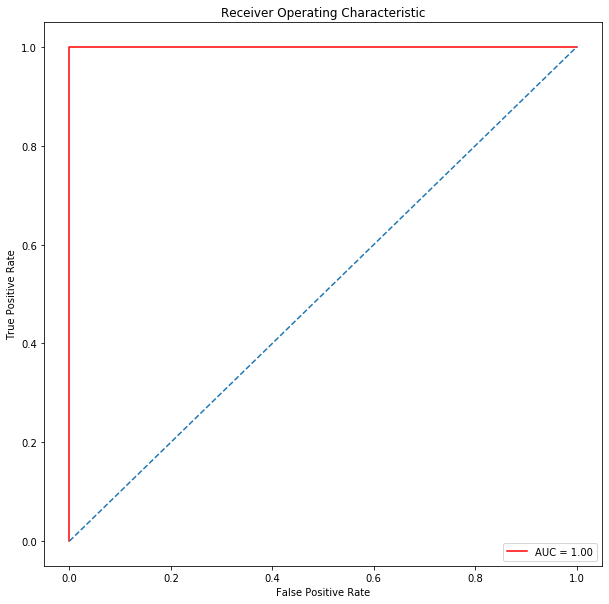

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Default Decision Tree Model

In [0]:
from sklearn.tree import DecisionTreeClassifier

model_tree=DecisionTreeClassifier()

In [123]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:
y_prob=model_tree.predict_proba(X_test)[:,1] #This will give you positive class prediction probabilities
y_pred=np.where(y_prob>0.5,1,0) #This will threshold the probabilities to give class predictions.
model_tree.score(X_test,y_pred)

1.0

In [125]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [126]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [127]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [0]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(false_positive_rate,true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

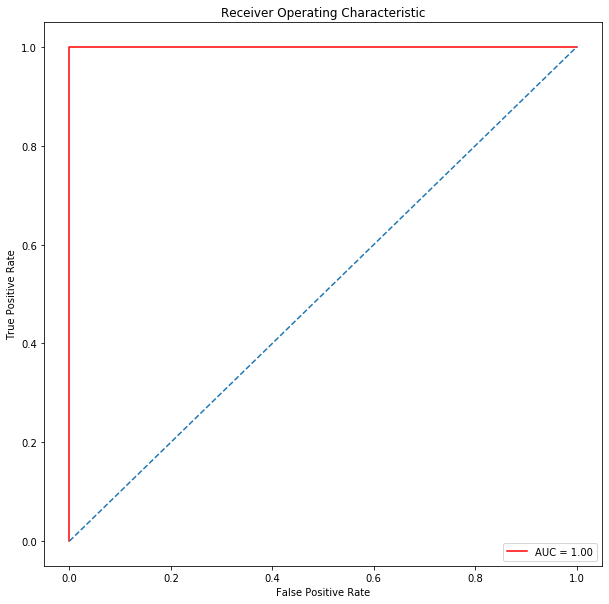

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Tuning hyper parameters for decision tree

1)Criterion: Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes.Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes. The details of Gini and entropy needs detail explanation.

2)max_depth(Maximum depth of tree (vertical depth)): Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

max_features and min_samples_leaf is same as Random Forest classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
model_DD=DecisionTreeClassifier()

tuned_parameters= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2"],
                   'min_samples_leaf': range(1,100,1) , 'max_depth': range(1,50,1)
                  }

In [0]:
from sklearn.model_selection import GridSearchCV
DD_model= RandomizedSearchCV(model_DD, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,random_state=5)

In [136]:
DD_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [138]:
print(DD_model.cv_results_)

{'mean_fit_time': array([0.0056736 , 0.00590911, 0.0053308 , 0.00587251, 0.00448329,
       0.00458715, 0.00501959, 0.00556152, 0.00404477, 0.00382085,
       0.00446548, 0.00464833, 0.00501652, 0.00464664, 0.00459077,
       0.00476623, 0.00471509, 0.00495379, 0.00486708, 0.00457847]), 'std_fit_time': array([0.00121058, 0.00161424, 0.00129563, 0.00197843, 0.00038422,
       0.00043775, 0.00136992, 0.00256531, 0.00019085, 0.00013083,
       0.00031817, 0.00025836, 0.00156075, 0.00022451, 0.00041417,
       0.00013942, 0.00033422, 0.0004369 , 0.00040415, 0.00037006]), 'mean_score_time': array([0.00108056, 0.0013324 , 0.0010221 , 0.00101941, 0.00092332,
       0.0009737 , 0.00094409, 0.00095584, 0.00090864, 0.00102422,
       0.00096388, 0.00087414, 0.00097799, 0.0009408 , 0.00096266,
       0.00097234, 0.00097632, 0.00101516, 0.0010226 , 0.00092685]), 'std_score_time': array([1.72060985e-04, 9.60568585e-04, 5.87407449e-05, 7.14754127e-05,
       7.22281638e-05, 6.21383953e-05, 8.9701219

In [139]:
print(DD_model.best_score_)

0.9956923076923078


In [141]:
print(DD_model.best_params_)

{'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 31, 'criterion': 'entropy'}


In [142]:
y_prob=DD_model.predict_proba(X_test)[:,1] #This will give you positive class prediction probabilities
y_pred=np.where(y_prob>0.5,1,0) #This will threshold the probabilities to give class predictions
DD_model.score(X_test,y_pred)

1.0

In [144]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  2, 778]])

In [145]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [146]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9987179487179487

In [147]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.9999969655590957

Text(0.5, 0, 'False Positive Rate')

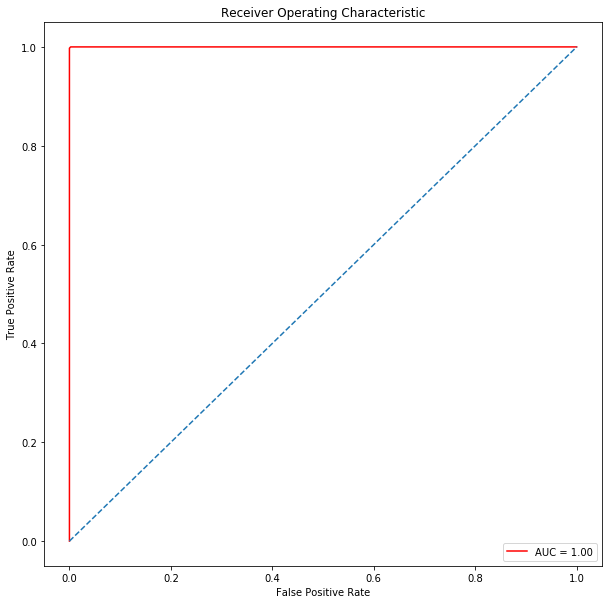

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Neural Network

Applying default Neural Network Model

In [149]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [150]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [151]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [153]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [154]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [155]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

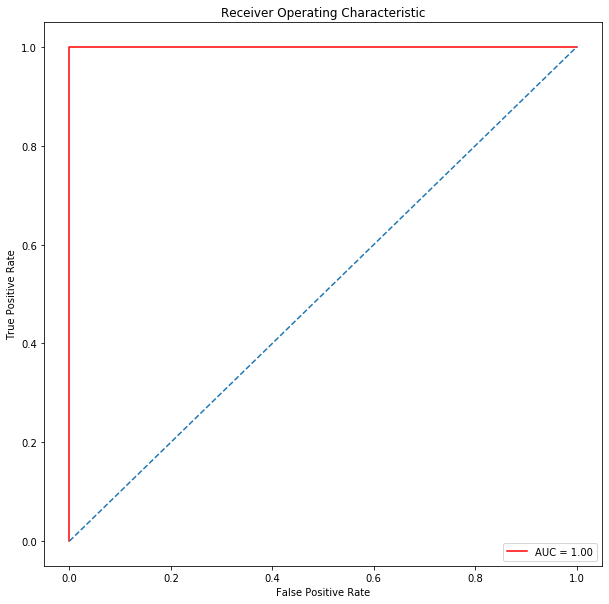

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Tuning the hyperparameters of the neural network
It is turning out to be computationally expensive for me with tuned model. Hence I am not running this. Also any suggestion to improvise it is welcome. :)

1) hidden_layer_sizes : Number of hidden layers in the network.(default is 100).Large number may overfit the data.

2)activation: Activation function for the hidden layer. A)‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)). B)‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x). C)‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

3)alpha: L2 penalty (regularization term) parameter.(default 0.0001)

4)max_iter: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.(default 200)

In [157]:
'''
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

tuned_parameters={'hidden_layer_sizes': range(1,200,10) , 'activation': ['tanh','logistic','relu'],
                  'alpha':[0.0001,0.001,0.01,0.1,1,10], 'max_iter': range(50,200,50)
    
}
'''

"\nfrom sklearn.neural_network import MLPClassifier\n\nmlp = MLPClassifier()\n\ntuned_parameters={'hidden_layer_sizes': range(1,200,10) , 'activation': ['tanh','logistic','relu'],\n                  'alpha':[0.0001,0.001,0.01,0.1,1,10], 'max_iter': range(50,200,50)\n    \n}\n"

In [0]:
#from sklearn.grid_search import RandomizedSearchCV
#model_mlp= RandomizedSearchCV(mlp_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=5,n_jobs= -1,random_state=5)

In [0]:
#model_mlp.fit(X_train, y_train)

In [0]:
#print(model_mlp.grid_scores_)

In [0]:
#print(model_mlp.best_score_)

In [0]:
#print(model_mlp.best_params_)

In [163]:
'''
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)
'''

'\ny_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  \ny_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.\nmodel_LR.score(X_test, y_pred)\n'

In [0]:
#confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
#confusion_matrix

In [0]:
#auc_roc=metrics.classification_report(y_test,y_pred)
#auc_roc

In [0]:
#auc_roc=metrics.roc_auc_score(y_test,y_pred)
#auc_roc

In [167]:
'''
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
'''

'\nfrom sklearn.metrics import roc_curve, auc\nfalse_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)\nroc_auc = auc(false_positive_rate, true_positive_rate)\n'

In [168]:
'''
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
'''

"\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(10,10))\nplt.title('Receiver Operating Characteristic')\nplt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)\nplt.legend(loc = 'lower right')\nplt.plot([0, 1], [0, 1],linestyle='--')\nplt.axis('tight')\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\n"